<a href="https://colab.research.google.com/github/AKMADOU/Memoire/blob/main/Memoire_AKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense
from sklearn import set_config 
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('/content/AutoInsuranceClaims (1).csv')
df.shape

(9134, 26)

In [3]:
data=df.copy()

In [4]:
data.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
data.head(3)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/2011,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/2011,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/2011,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize


In [6]:
# Claim=np.median(data['Claim Amount'])
# Claim_class=(data['Claim Amount']<=np.median(data['Claim Amount']))*1
# Claim_class.value_counts()

In [7]:
data.Response.value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [8]:
data.drop(columns=["Effective To Date","State Code","Customer",
                  "Policy Type","Country","Sales Channel"],inplace=True)

In [9]:
data.head(3)

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Collision,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Scratch/Dent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Collision,566.472247,Two-Door Car,Medsize


In [ ]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (163, 20)


In [ ]:
data = data.drop_duplicates()
data.head()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Collision,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Scratch/Dent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Collision,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Collision,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Collision,138.130879,Four-Door Car,Medsize


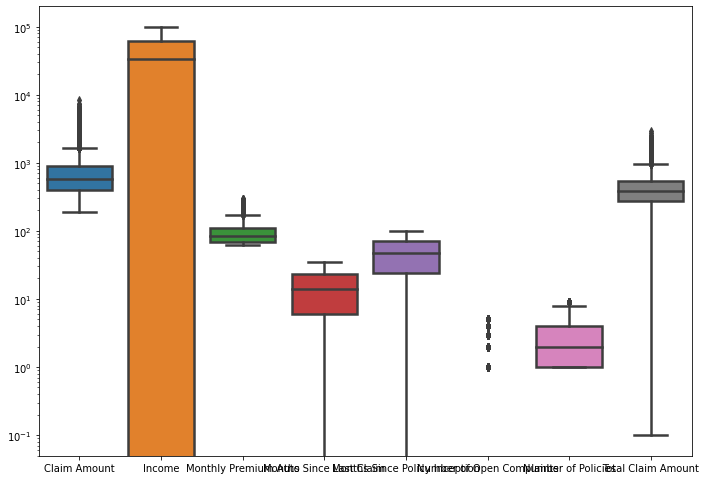

In [ ]:
import matplotlib.pyplot as plt


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=data,linewidth=2.5,ax=ax)
g.set_yscale("log")

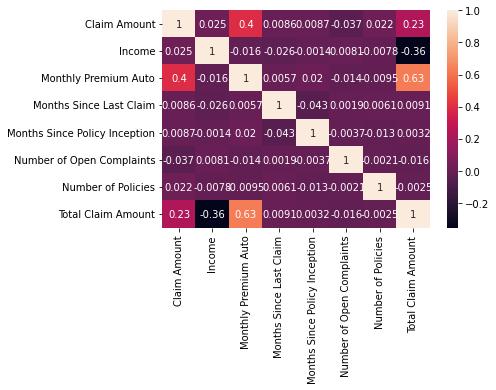

In [ ]:
relation =data.corr()
relation_index=relation.index
sns.heatmap(data[relation_index].corr(),annot=True)

In [ ]:
data['Claim Reason'].value_counts()

Collision       3685
Hail            2833
Scratch/Dent    1429
Other           1024
Name: Claim Reason, dtype: int64

In [ ]:
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm',axis=None)

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.025332,0.398702,0.008609,0.008715,-0.037128,0.022039,0.227534
Income,0.025332,1.000000,-0.016478,-0.026008,-0.001438,0.008091,-0.007824,-0.355936
Monthly Premium Auto,0.398702,-0.016478,1.000000,0.005730,0.019598,-0.013546,-0.009477,0.630994
Months Since Last Claim,0.008609,-0.026008,0.005730,1.000000,-0.043088,0.001899,0.006098,0.009106
Months Since Policy Inception,0.008715,-0.001438,0.019598,-0.043088,1.000000,-0.003693,-0.012592,0.003236
Number of Open Complaints,-0.037128,0.008091,-0.013546,0.001899,-0.003693,1.000000,-0.002128,-0.015620
Number of Policies,0.022039,-0.007824,-0.009477,0.006098,-0.012592,-0.002128,1.000000,-0.002472
Total Claim Amount,0.227534,-0.355936,0.630994,0.009106,0.003236,-0.015620,-0.002472,1.000000


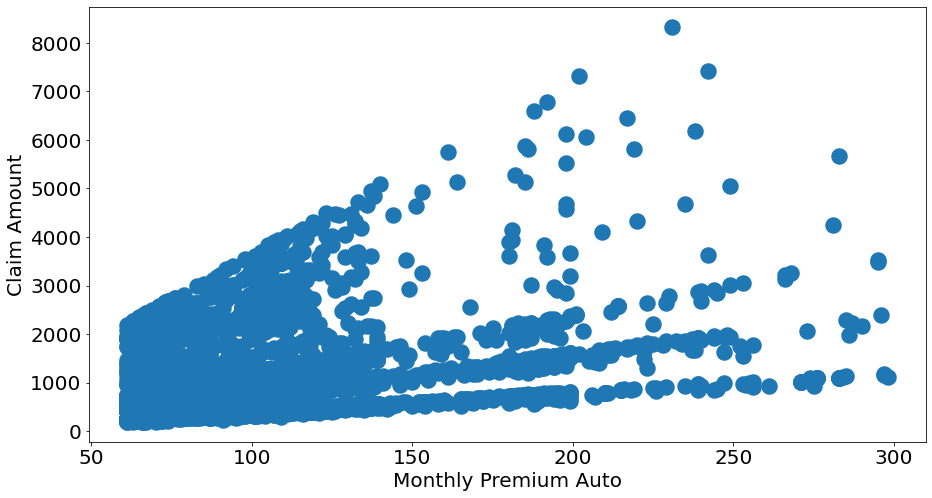

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Monthly Premium Auto' ,fontsize=20)
plt.ylabel('Claim Amount', fontsize=20)

# g = sns.countplot(x='Claim Reason',data=data[data['Claim Amount']>0], ax=ax2);
# title = g.set_title('Values nulles exclues');

plt.scatter(data['Monthly Premium Auto'],data['Claim Amount'],linewidth = '10.5')
# plt.savefig('Income')

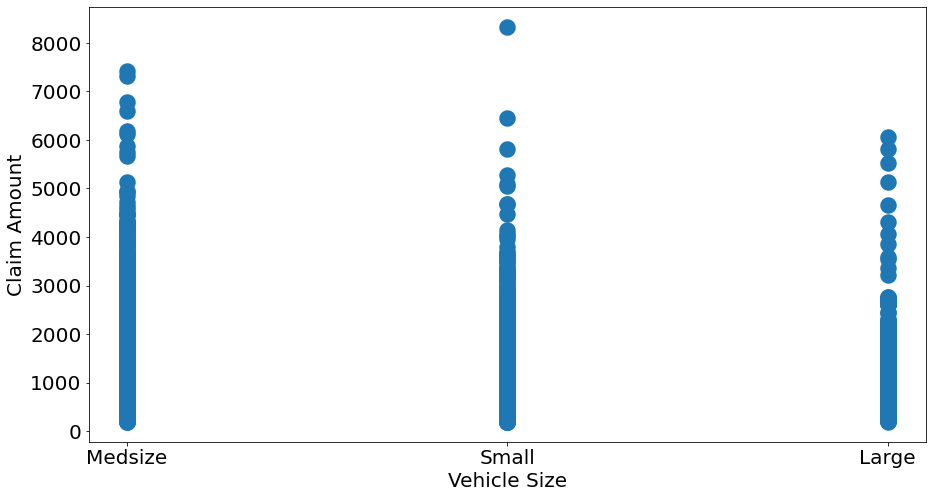

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Vehicle Size' ,fontsize=20)
plt.ylabel('Claim Amount', fontsize=20)

# g = sns.countplot(x='Claim Reason',data=data[data['Claim Amount']>0], ax=ax2);
# title = g.set_title('Values nulles exclues');

plt.scatter(data['Vehicle Size'],data['Claim Amount'],linewidth = '10.5')
plt.savefig('Vehicle Size')

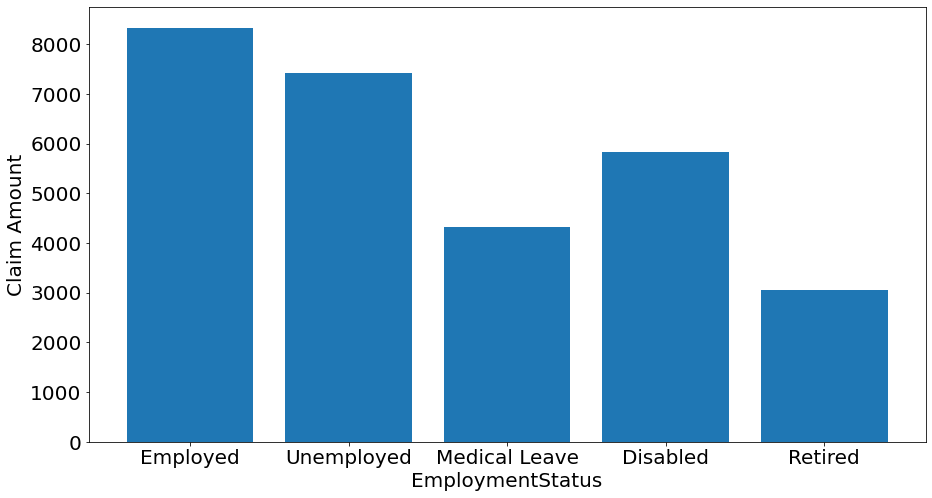

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('EmploymentStatus' ,fontsize=20)
plt.ylabel('Claim Amount', fontsize=20)

# g = sns.countplot(x='Claim Reason',data=data[data['Claim Amount']>0], ax=ax2);
# title = g.set_title('Values nulles exclues');

plt.bar(data['EmploymentStatus'],data['Claim Amount'],linewidth = '10.5')
plt.savefig('EmploymentStatus')
# plt.grid()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Claim Amount,8971.0,800.419232,686.794104,189.800768,399.94977,579.243959,895.463711,8332.538119
Income,8971.0,37644.828113,30431.741597,0.000000,0.00000,33947.000000,62365.500000,99981.000000
Monthly Premium Auto,8971.0,93.192621,34.358960,61.000000,68.00000,83.000000,109.000000,298.000000
Months Since Last Claim,8971.0,15.099209,10.077668,0.000000,6.00000,14.000000,23.000000,35.000000
Months Since Policy Inception,8971.0,48.054175,27.916442,0.000000,24.00000,48.000000,71.000000,99.000000
Number of Open Complaints,8971.0,0.385241,0.909666,0.000000,0.00000,0.000000,0.000000,5.000000
Number of Policies,8971.0,2.970349,2.391832,1.000000,1.00000,2.000000,4.000000,9.000000
Total Claim Amount,8971.0,433.886437,291.074428,0.099007,270.47269,383.442328,547.988754,2893.239678


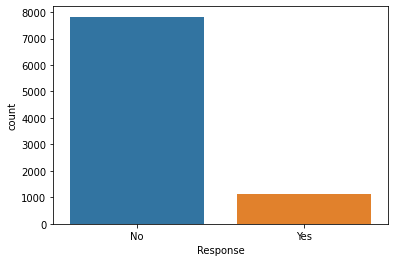

In [ ]:
sns.countplot(x='Response',data=data);

>* Comme vous pouvez le voir, les non survenances du sinistre l’emportent de loin
sur les survenances du sinistre.

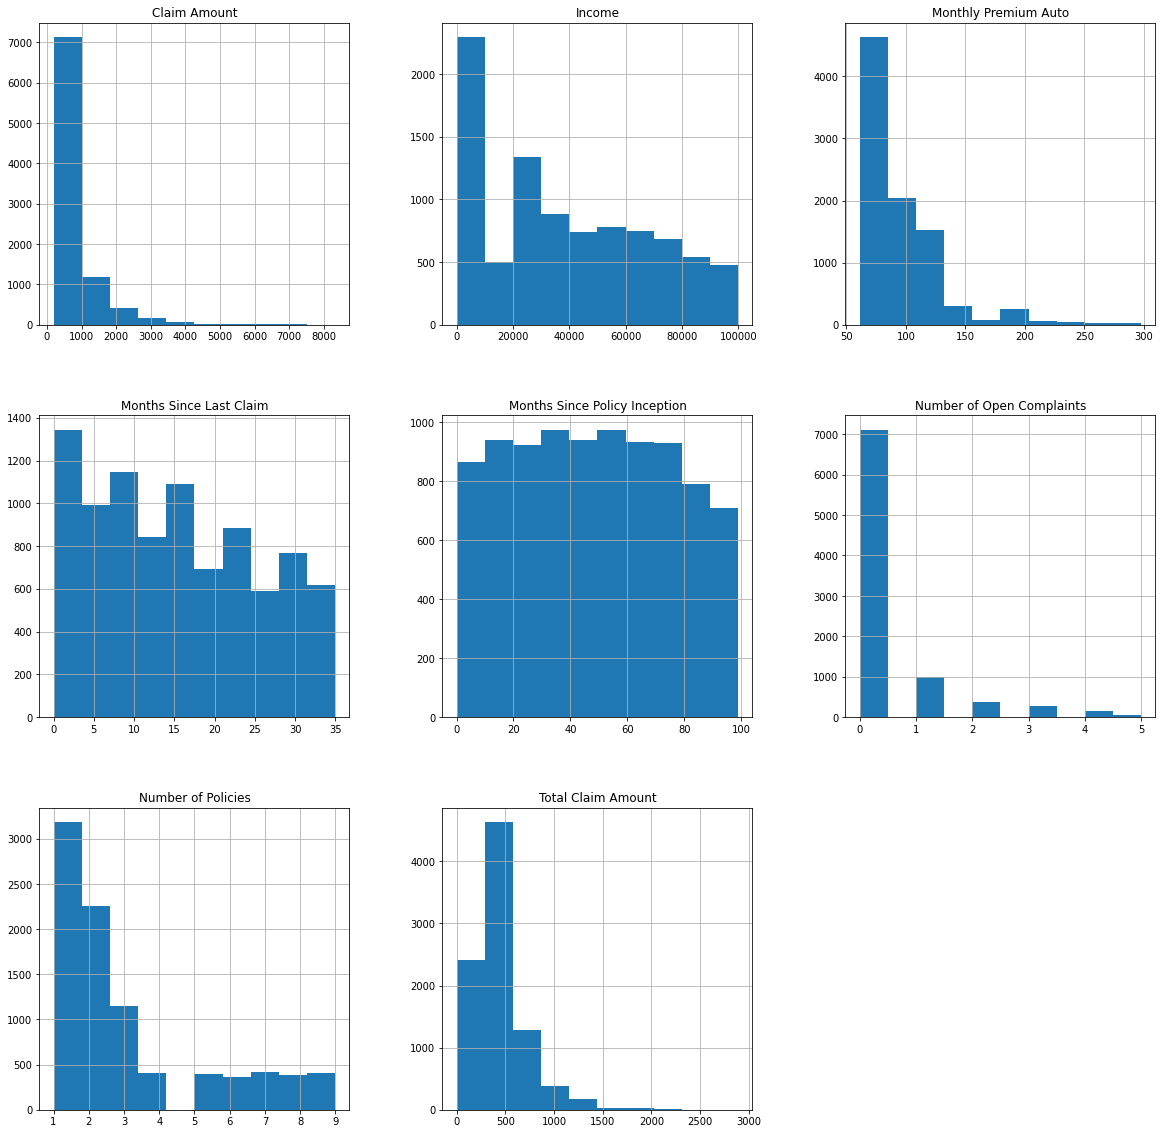

In [ ]:
data.hist(figsize=(20,20))
plt.show()

>* Les graphiques ci-dessus laisse sortir une particularité dans nos données , que nous
allons étudier dans la suite de ce travaille.

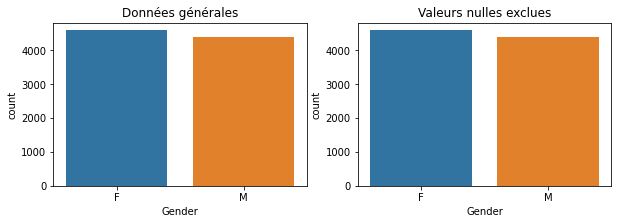

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='Gender',data=data.sort_values('Gender'), ax=ax1)
title = g.set_title('Données générales')
g = sns.countplot(x='Gender',data=data[data['Claim Amount']>0].sort_values('Gender'), ax=ax2)
title = g.set_title('Valeurs nulles exclues')

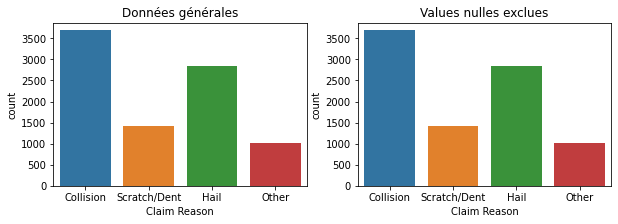

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2);
fig.set_size_inches(10,3);
g = sns.countplot(x='Claim Reason',data=data, ax=ax1);
title = g.set_title('Données générales');
g = sns.countplot(x='Claim Reason',data=data[data['Claim Amount']>0], ax=ax2);
title = g.set_title('Values nulles exclues');

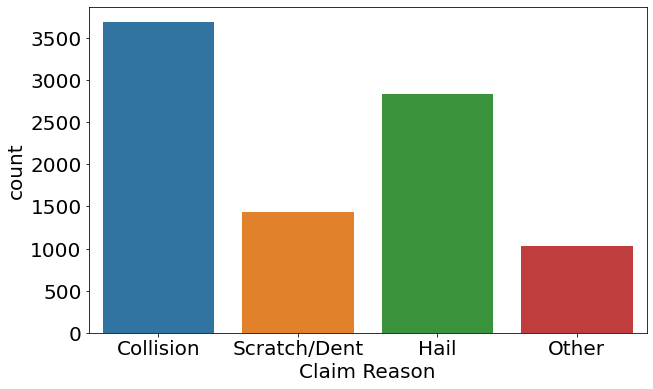

In [ ]:
fig, (ax1) = plt.subplots(ncols=1);
fig.set_size_inches(10,6);
g = sns.countplot(x='Claim Reason',data=data, ax=ax1);
# title = g.set_title('Données générales',fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Claim Reason' ,fontsize=20)
plt.ylabel('count', fontsize=20)

# g = sns.countplot(x='Claim Reason',data=data[data['Claim Amount']>0], ax=ax2);
# title = g.set_title('Values nulles exclues');
plt.savefig('Claim Reason')

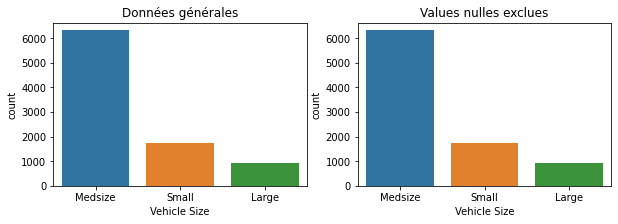

In [ ]:
# Vehicle Age
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='Vehicle Size',data=data,ax=ax1)
title = g.set_title('Données générales')
g = sns.countplot(x='Vehicle Size',data=data[data['Total Claim Amount']>0], ax=ax2)
title = g.set_title('Values nulles exclues')

In [ ]:
df4 = data[data.Response == 'Yes']

# Suppression des observations au-delà du 99e centile du coût de la réclamation

In [ ]:
df_excl_0_99 = df4[df4['Claim Amount'] < np.percentile(df4['Claim Amount'],99)]

# Tracé de densité et histogramme de tous les retards d’arrivée

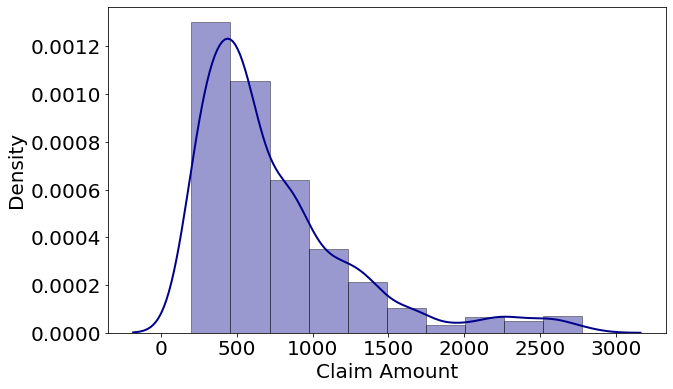

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df_excl_0_99['Claim Amount'], hist=True, kde=True,
bins=10,
color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 2});
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Claim Amount' ,fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.savefig('sinistre.png')

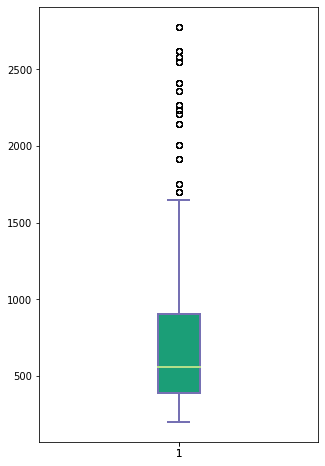

In [ ]:
# Create a figure instance
fig = plt.figure(1, figsize=(5, 8))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df_excl_0_99['Claim Amount'])

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(df_excl_0_99['Claim Amount'], patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

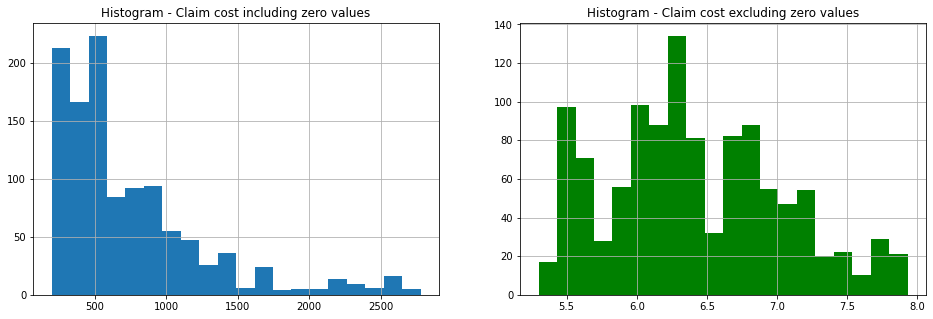

In [ ]:

# Comparing original and log transformed values
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(df_excl_0_99['Claim Amount'], bins=20)
ax1.set_title('Histogram - Claim cost including zero values')
ax1.grid(True)
ax2.hist(np.log(df_excl_0_99['Claim Amount']), bins=20, color='g')
ax2.set_title('Histogram - Claim cost excluding zero values')
ax2.grid(True)
plt.show()

Le premier histogramme (bleu) donne une intuition que les données sont très proches de la distribution gamma et un autre (vert) suggère que nous pouvons essayer un modèle log-normal, bien qu'il soit loin d'être parfaitement normal, a deux pics au début.

Nous avons un autre défi ici, nous devons trouver une technique qui remplace mathématiquement le montant de la réclamation par une gravité de la réclamation. Nous voulions influencer les résultats du modèle sans réellement inclure cette variable (nombre de sinistres) dans la modélisation. Nous pouvons y parvenir en utilisant un terme de décalage dans le modèle et l'OLS n'est pas une technique appropriée pour cette exigence.

Le modèle GLM est généralement configuré comme ci-dessous :

L'équation finale indique que le décalage doit être à la même échelle que le prédicteur linéaire f(x). Par conséquent, le journal (nombre de réclamations) peut être utilisé comme décalage.


# Entrainement et test des modèles

In [ ]:
Data = np.random.rand(len(df_excl_0_99)) < 0.8
df_train = df_excl_0_99[Data]
df_test = df_excl_0_99[~Data]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=911
Testing data set length=219


In [ ]:
data

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Collision,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Scratch/Dent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Collision,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Collision,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Collision,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,Missouri,410.039853,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal L2,Collision,541.282007,Four-Door Car,Large
9129,Missouri,2340.598798,No,Basic,Bachelor,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal L1,Hail,198.234764,Four-Door Car,Medsize
9131,Missouri,816.389043,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate L2,Collision,790.784983,Four-Door Car,Medsize
9132,Missouri,752.444244,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal L2,Scratch/Dent,691.200000,Four-Door Car,Large


In [ ]:
# df_train.rename(columns={'State':'State', 'Claim Amount':'Claim_Amount', 'Response':'Response', 'Coverage':'Coverage', 'Education':'Education',
#        'EmploymentStatus':'EmploymentStatus', 'Gender':'Gender', 'Income':'Income', 'Location Code':'Location_Code',
#        'Marital Status':'Marital_Status', 'Monthly Premium Auto':'Monthly_Premium_Auto', 'Months Since Last Claim':'Months_Since_Last_Claim',
#        'Months Since Policy Inception':'Months_Since_Policy_Inception', 'Number of Open Complaints':'Number_of_Open_Complaints',
#        'Number of Policies':'Number_of_Policies', 'Policy':'Policy', 'Claim Reason':'Claim_Reason', 'Total Claim Amount':'Total_Claim_Amount',
#        'Vehicle Class':'Vehicle_Class', 'Vehicle Size':'Vehicle_Size'
#                       })

# Expression du modèle

In [ ]:
expr = """ClaimA mount ~ Income+Gender+State+Location Code+Monthly Premium_Auto"""

In [ ]:
from patsy import dmatrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

PatsyError: ignored

In [ ]:
# Change each column to its appriopriate datatype
date_cols = [col for col in data.columns if 'Date' in col]
num_cols = ['Income', 'Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
            'Number of Open Complaints','Number of Policies','Total Claim Amount','Claim Amount']
cat_cols = [col for col in data.columns if col not in date_cols+num_cols]

for col in data.columns:
  if col in date_cols:
    data[col] = pd.to_datetime(data[col])
  elif col in cat_cols:
    data[col] = data[col].astype('category')

# Confirm whether the changes have been applied successfully
# data.info()
cat_cols

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy',
 'Claim Reason',
 'Vehicle Class',
 'Vehicle Size']

In [ ]:
data['Gender']=data['Gender'].apply(lambda row: 1 if row=='F' else 0)
binary_columns=data.drop('Gender',axis=1).nunique()[data.drop('Gender',axis=1).nunique()<3].keys().to_list()
binary_columns


['Response']

In [ ]:
for column in binary_columns:
  data[column]=data[column].apply(lambda row: 1 if row =='Yes' else 0)

In [ ]:
data_cat_vars=data[cat_cols].nunique()[data[cat_cols].nunique()>2].keys().to_list()
data_cat_vars_dummies=pd.get_dummies(data=data[data_cat_vars],columns=data_cat_vars,drop_first=True,dummy_na=False)

In [ ]:
Data=pd.concat([data['Gender'],data[binary_columns],data_cat_vars_dummies,data[num_cols]],axis=1)

In [ ]:
Data.head(3)

,Gender,Response,State_Kansas,State_Missouri,State_Nebraska,State_Oklahoma,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Claim Amount
0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,56274,69,32,5,0,1,384.811147,276.351928
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,94,13,42,0,8,1131.464935,697.953590
2,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,48767,108,18,38,0,2,566.472247,1288.743165


In [ ]:
Data.shape

(8971, 46)

In [ ]:
# X_scaler=data.drop('Claim Amount',axis=1)
# Y=np.array(data['Claim Amount'])

In [ ]:
# scaler = preprocessing.StandardScaler()
# scaler = scaler.fit(Data)
# scaled = scaler.transform(Data)
# # scaled = scaler.fit_transform(Data)
# scaled_data = pd.DataFrame(scaled, columns=Data.columns)

In [ ]:
cols = list(Data.columns[0:-1])
X, y = Data[cols], Data['Claim Amount']


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((7176, 45), (1795, 45), (7176,), (1795,))

In [ ]:
scalerX = preprocessing.StandardScaler().fit(X_train)
scalery = preprocessing.StandardScaler().fit(Y_train.values.reshape(-1,1))
X_train = scalerX.transform(X_train)
Y_train = scalery.transform(Y_train.values.reshape(-1,1))
X_test = scalerX.transform(X_test)
Y_test = scalery.transform(Y_test.values.reshape(-1,1))


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(X_scaler,Y,test_size=0.8,random_state=0,shuffle=True)

In [ ]:
print("Les données de test et de train ce présentent comme:")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", Y_train.shape)
print("y_test: ", Y_test.shape)

Les données de test et de train ce présentent comme:
X_train:  (7176, 45)
X_test:  (1795, 45)
y_train:  (7176, 1)
y_test:  (1795, 1)


In [ ]:
#!pip install pycaret

In [ ]:
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor(n_estimators = 250,random_state = 284)
print(rfr)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=284, verbose=0,
                      warm_start=False)


In [ ]:
rfr.fit(X_train,Y_train)
score = rfr.score(X_train,Y_train)
print("R-squared:", score) 

R-squared: 0.9577540352668036


In [ ]:
# rfr.fit(X_train,Y_train)
score = rfr.score(X_test,Y_test)
print("R-squared:", score) 

R-squared: 0.7119570594422433


In [ ]:
ypred = rfr.predict(X_test)

mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.2722279993350564
RMSE:  0.1361139996675282


In [ ]:
ypred_rf = scalery.inverse_transform(ypred.reshape(-1,1))
ytest_rf = scalery.inverse_transform(Y_test.reshape(-1,1))

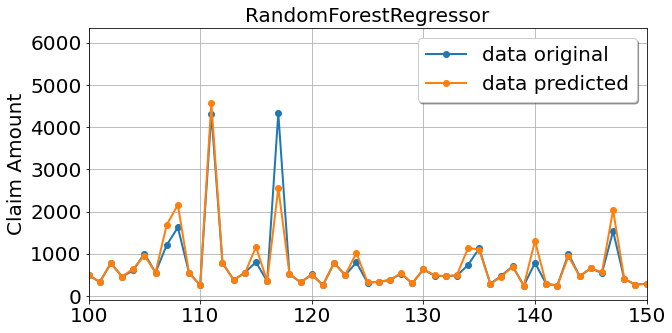

In [ ]:
x_ax = range(len(Y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, ytest_rf, linewidth=2,marker='o', label="data original")
plt.plot(x_ax, ypred_rf, linewidth=2,marker='o', label="data predicted")
plt.title("RandomForestRegressor", fontsize=20)
# plt.xlabel('Y_pred', fontsize=20)
plt.ylabel('Claim Amount',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best',fancybox=True, shadow=True,fontsize=20)
plt.grid(True)
plt.xlim(100,150)
plt.show() 

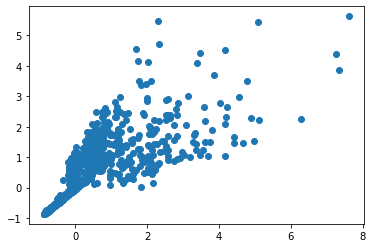

In [ ]:
plt.scatter( Y_test,ypred)

In [ ]:
set_config(print_changed_only=False) 
 
dtr = DecisionTreeRegressor()
print(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')


In [ ]:
dtr.fit(X_train, Y_train)
score = dtr.score(X_train, Y_train)
print("R-squared:", score) 

R-squared: 1.0


In [ ]:
dtr.fit(X_train,Y_train)
score = dtr.score(X_test,Y_test)
print("R-squared:", score) 

R-squared: 0.4663334358555079


In [ ]:
pred = dtr.predict(X_test)

rmse = mean_squared_error(Y_test, pred)
print("MSE: ", rmse)
print("RMSE: ", rmse*(1/2.0)) 

MSE:  0.5043657059872925
RMSE:  0.25218285299364623


In [ ]:
ypred_dt = scalery.inverse_transform(pred.reshape(-1,1))
ytest_dt = scalery.inverse_transform(Y_test.reshape(-1,1))

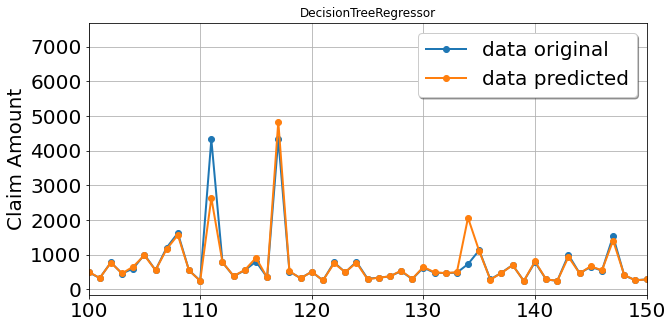

In [ ]:
x_ax = range(len(Y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, ytest_dt, linewidth=2,marker='o', label="data original")
plt.plot(x_ax, ypred_dt, linewidth=2,marker='o', label="data predicted")
plt.title("DecisionTreeRegressor")
# plt.xlabel('X-axis',fontsize=20)
plt.ylabel('Claim Amount',fontsize=20)
plt.legend(loc='best',fancybox=True, shadow=True, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.xlim(100,150)
plt.show() 

In [ ]:
# definition du modèle
model = Sequential()
model.add(Dense(13, input_dim=45, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='he_uniform'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae','mse'])

In [ ]:
history = model.fit(X_train, Y_train, 
    epochs=10, 
    batch_size=8, 
    validation_data=(X_test,Y_test),
    verbose=1
)

Epoch 1/10
897/897 [==============================] - 2s 2ms/step - loss: 1.1102 - mae: 0.6533 - mse: 1.1102 - val_loss: 0.9074 - val_mae: 0.6161 - val_mse: 0.9074
Epoch 2/10
897/897 [==============================] - 2s 2ms/step - loss: 0.9271 - mae: 0.5947 - mse: 0.9271 - val_loss: 0.8487 - val_mae: 0.5715 - val_mse: 0.8487
Epoch 3/10
897/897 [==============================] - 2s 2ms/step - loss: 0.8694 - mae: 0.5670 - mse: 0.8694 - val_loss: 0.8042 - val_mae: 0.5728 - val_mse: 0.8042
Epoch 4/10
897/897 [==============================] - 2s 2ms/step - loss: 0.7933 - mae: 0.5402 - mse: 0.7933 - val_loss: 0.7167 - val_mae: 0.4985 - val_mse: 0.7167
Epoch 5/10
897/897 [==============================] - 2s 2ms/step - loss: 0.6980 - mae: 0.4805 - mse: 0.6980 - val_loss: 0.5909 - val_mae: 0.4327 - val_mse: 0.5909
Epoch 6/10
897/897 [==============================] - 2s 2ms/step - loss: 0.5469 - mae: 0.4021 - mse: 0.5469 - val_loss: 0.4367 - val_mae: 0.3663 - val_mse: 0.4367
Epoch 7/10
897/8

In [ ]:
results= model.evaluate(X_test, Y_test )
for i in range(len(model.metrics_names)):
      print(model.metrics_names[i]," : ", results[i])

57/57 [==============================] - 0s 1ms/step - loss: 0.3448 - mae: 0.3330 - mse: 0.3448
loss  :  0.34477463364601135
mae  :  0.33298739790916443
mse  :  0.34477463364601135


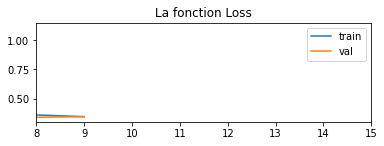

In [ ]:
pyplot.subplot(211)
pyplot.title('Loss')
plt.title("La fonction Loss")
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
plt.xlim(8,50)
pyplot.legend()

In [ ]:
pred = model.predict(X_test)
pred

array([[-0.9041619 ],
       [ 0.11691427],
       [-0.8664184 ],
       ...,
       [ 0.20890391],
       [-0.36783308],
       [-0.03109401]], dtype=float32)

In [ ]:
ypred_nn = scalery.inverse_transform(pred)
ytest_nn = scalery.inverse_transform(Y_test.reshape(-1,1))

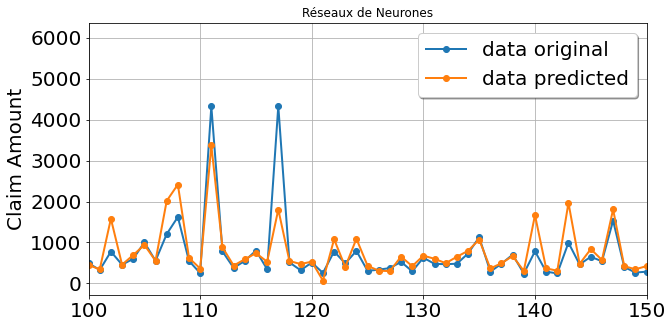

In [ ]:
x_ax = range(len(Y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, ytest_nn, linewidth=2,marker='o', label="data original")
plt.plot(x_ax, ypred_nn, linewidth=2,marker='o', label="data predicted")
plt.title("Réseaux de Neurones")
# plt.xlabel('X-axis',fontsize=20)
plt.ylabel('Claim Amount',fontsize=20)
plt.legend(loc='best',fancybox=True, shadow=True, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.xlim(100,150)
plt.show() 